<a href="https://colab.research.google.com/github/nagmafarez/IDS-Assignment/blob/main/SLR_%26_MLR_for_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
  #Importing Necessary Libraries

  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from statsmodels.graphics.regressionplots import influence_plot
  import statsmodels.formula.api as smf
  import numpy as np

In [5]:
#Read the data
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Check for missing values
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Performing EDA

In [8]:
#Summerizing the data
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Handling Missing Values

In [9]:
#Check for missing values
insurance.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Encoding Categorical Data

*Sex* *Column*

In [10]:
# Check for missing values in the 'sex' column
insurance['sex'].isnull().sum()


np.int64(0)

In [11]:
# Clean the 'sex' column
insurance['sex'] = insurance['sex'].str.strip().str.lower()


In [12]:
# Encode the 'sex' column
insurance['sex'] = insurance['sex'].map({'female': 0, 'male': 1})


In [13]:
# Check the unique values in 'sex' column after encoding
insurance['sex'].unique()


array([0, 1])

In [14]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


*Region*

In [15]:
# Encode the 'region' column
insurance['region'] = insurance['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [16]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,0,16884.92400
1,18,1,33.770,1,no,1,1725.55230
2,28,1,33.000,3,no,1,4449.46200
3,33,1,22.705,0,no,2,21984.47061
4,32,1,28.880,0,no,2,3866.85520


In [17]:
# Encode the 'smoker' column
insurance['smoker'] = insurance['smoker'].map({'yes': 0, 'no': 1})

In [18]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


# CORRELATION MATRIX

In [19]:
insurance.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,-0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


# *Scatter Plot between variables along with Histograms*

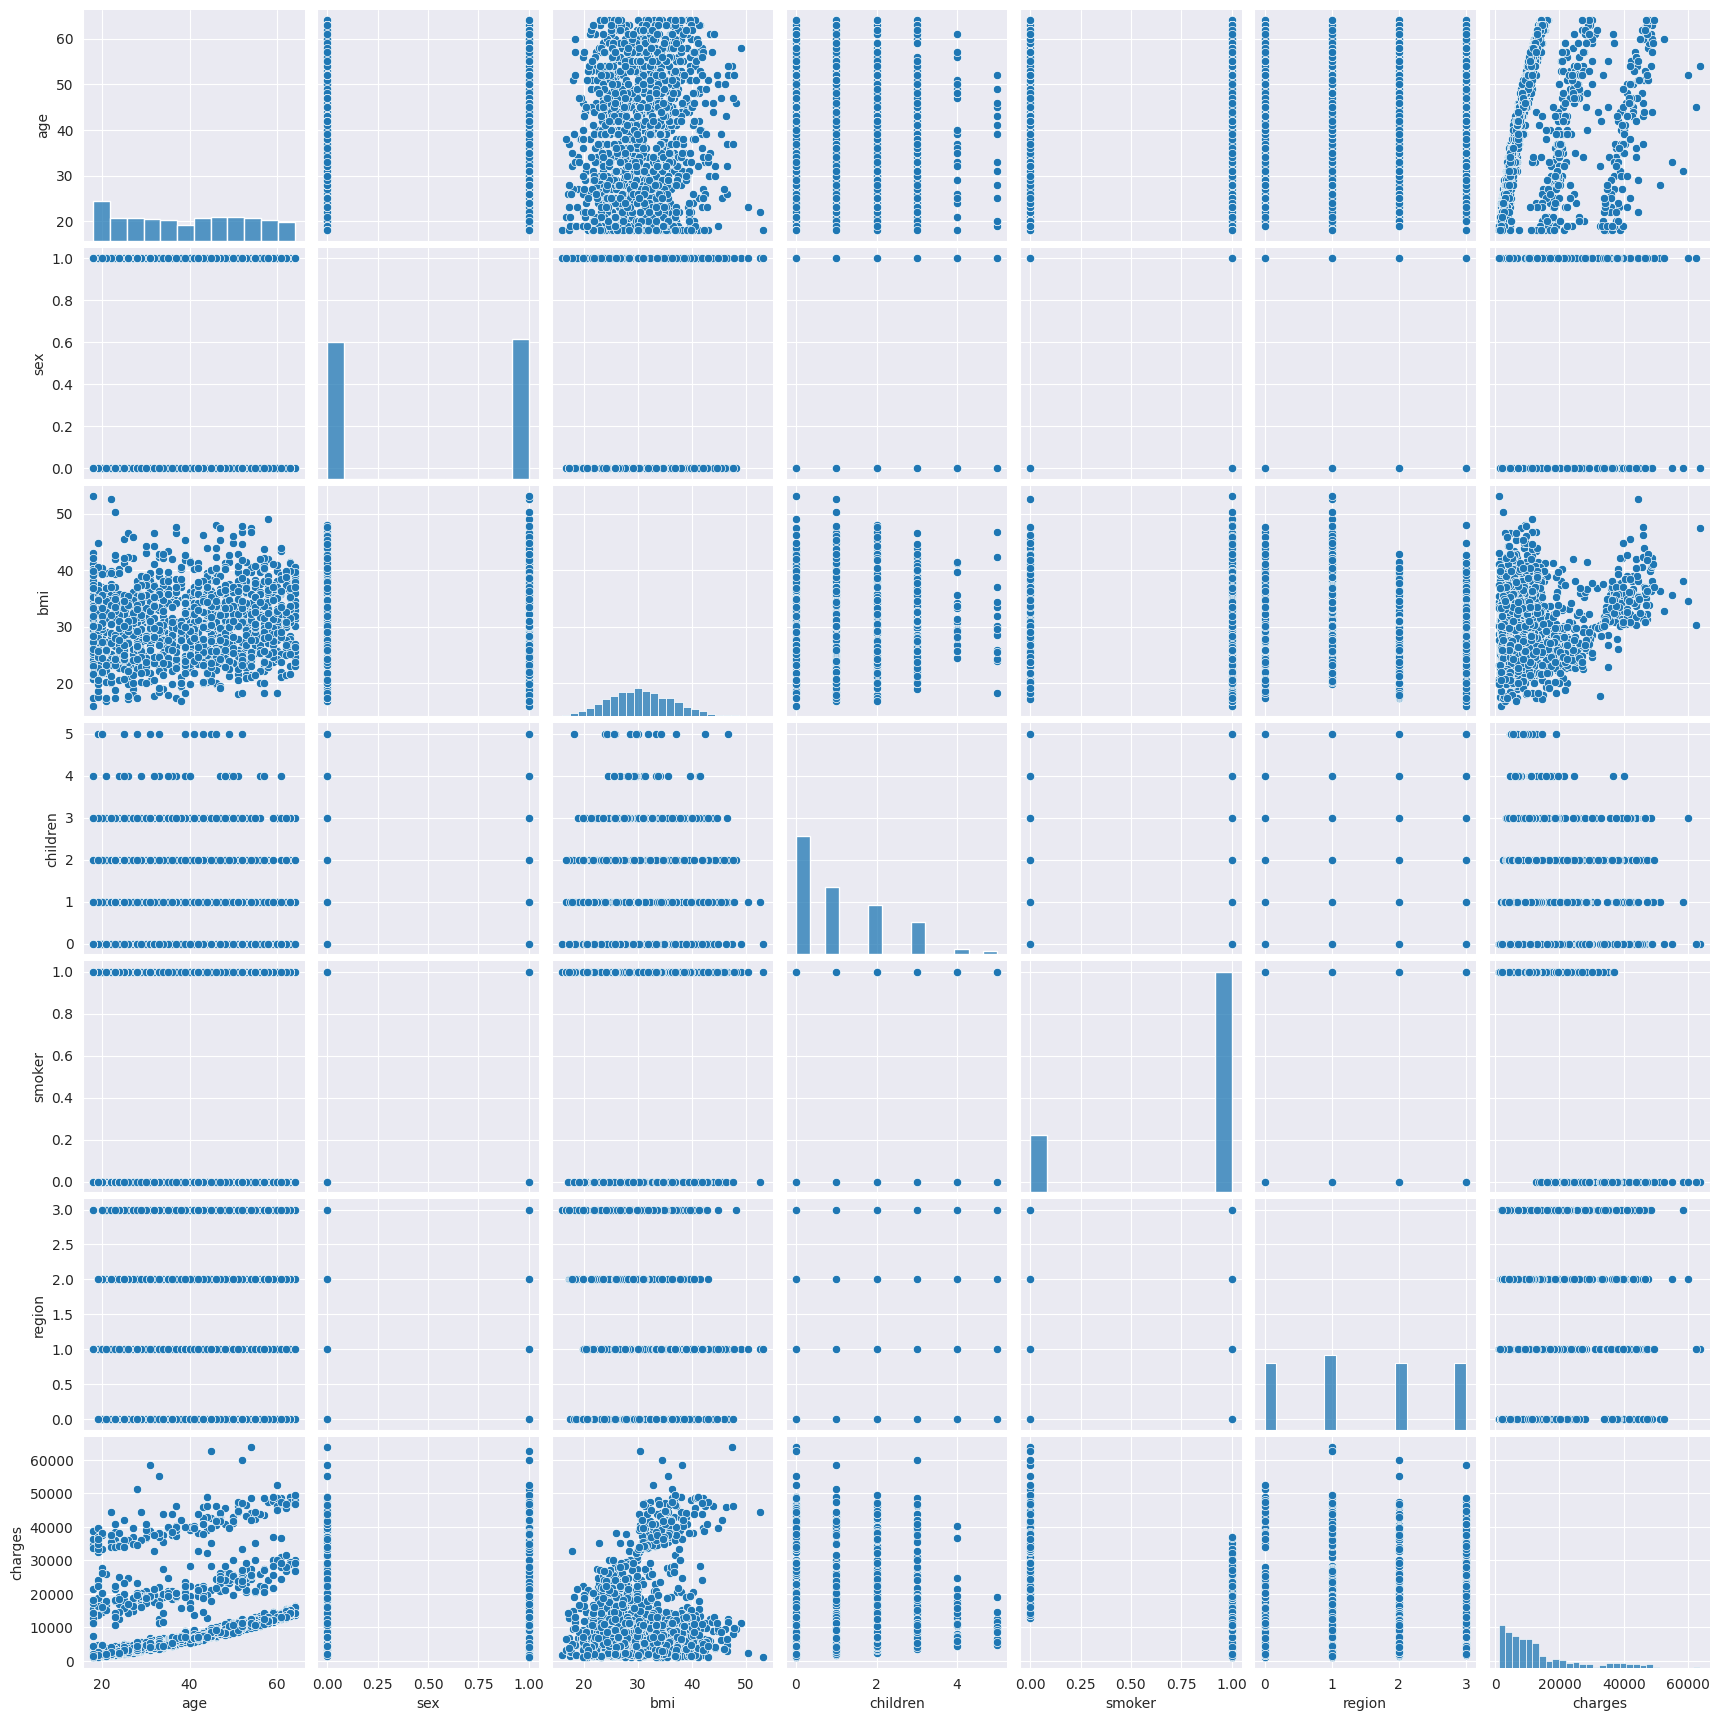

In [20]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(insurance)

# Preparing a model

In [21]:
#Build a model
import statsmodels.formula.api as smf
model = smf.ols('charges~smoker+age+bmi+children', data = insurance).fit()

In [22]:
#coefficients
model.params

,0
Intercept,11708.630482
smoker,-23811.399845
age,257.849507
bmi,321.851402
children,473.502316


In [23]:
#t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept    11.810829
smoker      -57.904325
age          21.674608
bmi          11.755999
children      3.436364
dtype: float64 
 Intercept    1.095013e-30
smoker       0.000000e+00
age          1.748342e-89
bmi          1.973987e-30
children     6.077158e-04
dtype: float64


In [24]:
#R Squared values
(model.rsquared,model.rsquared_adj)

(np.float64(0.749694530346479), np.float64(0.7489434261614722))

In [25]:
#R Squared values
(model.rsquared,model.rsquared_adj)

(np.float64(0.749694530346479), np.float64(0.7489434261614722))

# **Simple Linear Regression Models**

In [26]:
ml_s=smf.ols('charges~smoker' ,data = insurance).fit()
#t and p values
print(ml_s.tvalues, '\n', ml_s.pvalues)

Intercept    71.018793
smoker      -46.664921
dtype: float64 
 Intercept     0.000000e+00
smoker       8.271436e-283
dtype: float64


In [27]:
ml_b=smf.ols('charges~bmi' ,data = insurance).fit()
#t and p values
print(ml_b.tvalues, '\n', ml_b.pvalues)

Intercept    0.716564
bmi          7.396574
dtype: float64 
 Intercept    4.737685e-01
bmi          2.459086e-13
dtype: float64


In [28]:
ml_sb=smf.ols('charges~smoker+bmi' ,data = insurance).fit()
#t and p values
print(ml_sb.tvalues, '\n', ml_sb.pvalues)

Intercept    18.889468
smoker      -49.135651
bmi          12.206543
dtype: float64 
 Intercept     1.022321e-70
smoker       1.203836e-301
bmi           1.452301e-32
dtype: float64


# **Calculating** **VIF**

In [29]:
rsq_s = smf.ols('smoker~age+bmi+children' ,data = insurance).fit().rsquared
vif_s = 1/(1-rsq_s)

rsq_a = smf.ols('age~smoker+bmi+children' ,data = insurance).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_b = smf.ols('bmi~smoker+age+children' ,data = insurance).fit().rsquared
vif_b = 1/(1-rsq_b)

rsq_c = smf.ols('children~smoker+age+bmi' ,data = insurance).fit().rsquared
vif_c = 1/(1-rsq_c)

# Storing vif values in a data frame
d1 = {'Variables':['smoker','age','bmi','children'],'VIF':[vif_s,vif_a,vif_b,vif_c]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,smoker,1.000745
1,age,1.014498
2,bmi,1.012194
3,children,1.001950


# Residual Analysis

# Test for Normality of Residuals (Q-Q plot)

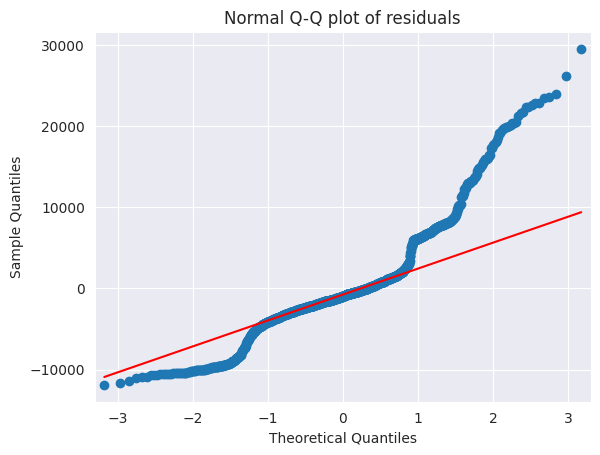

In [30]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid>25000))

[array([ 577, 1300])]

# Residual Plot for Homoscedasticity


In [32]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

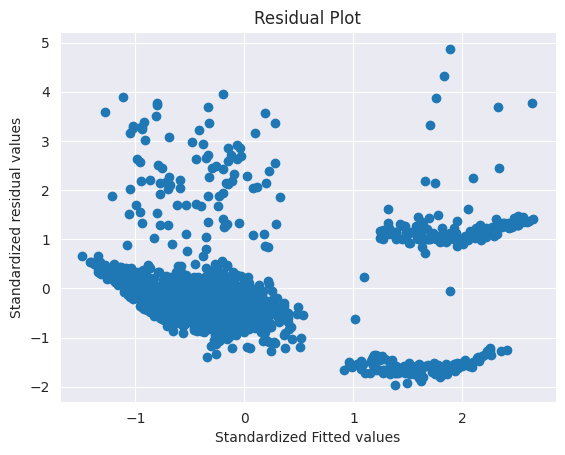

In [33]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

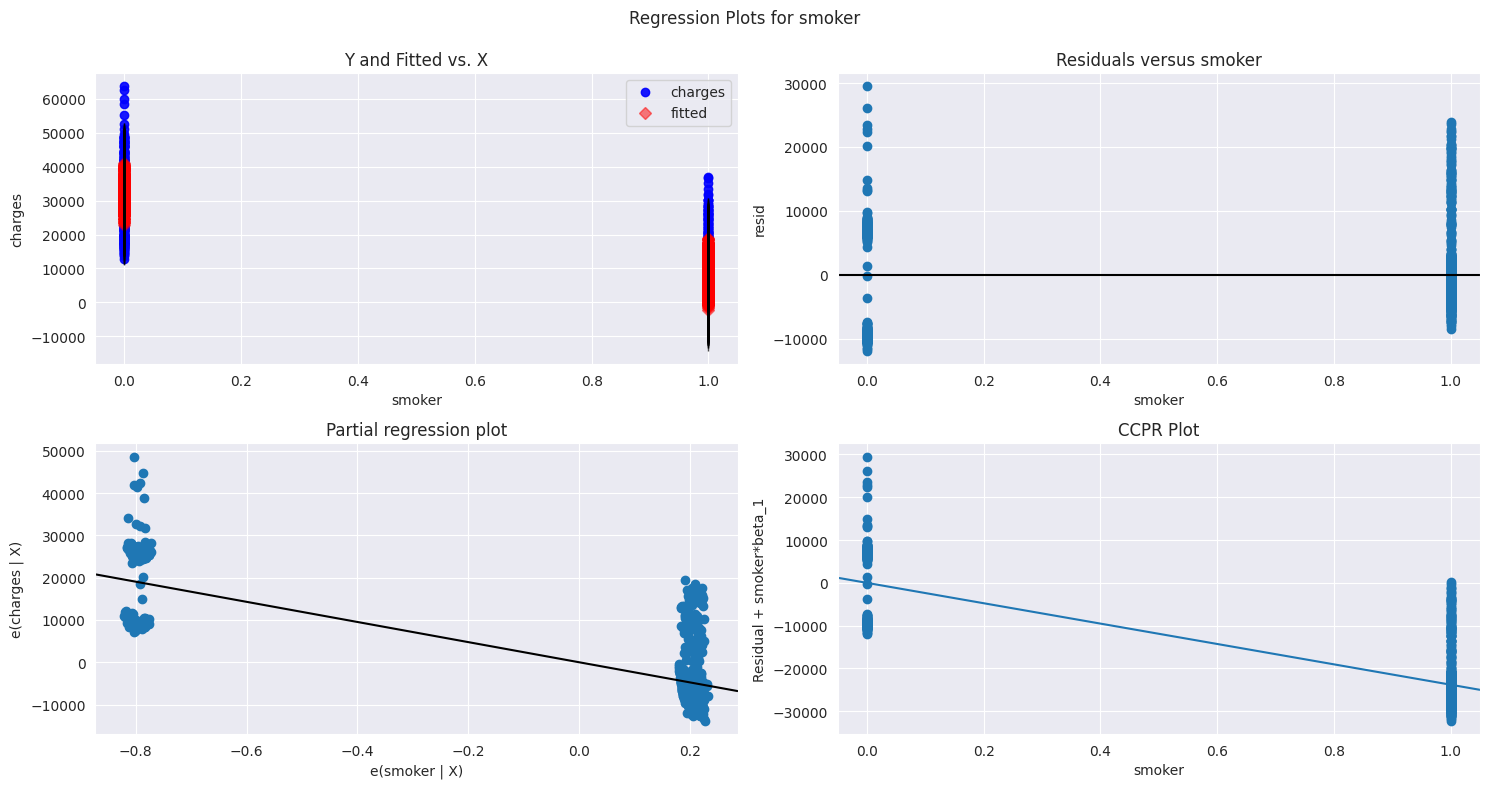

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "smoker", fig=fig)
plt.show()

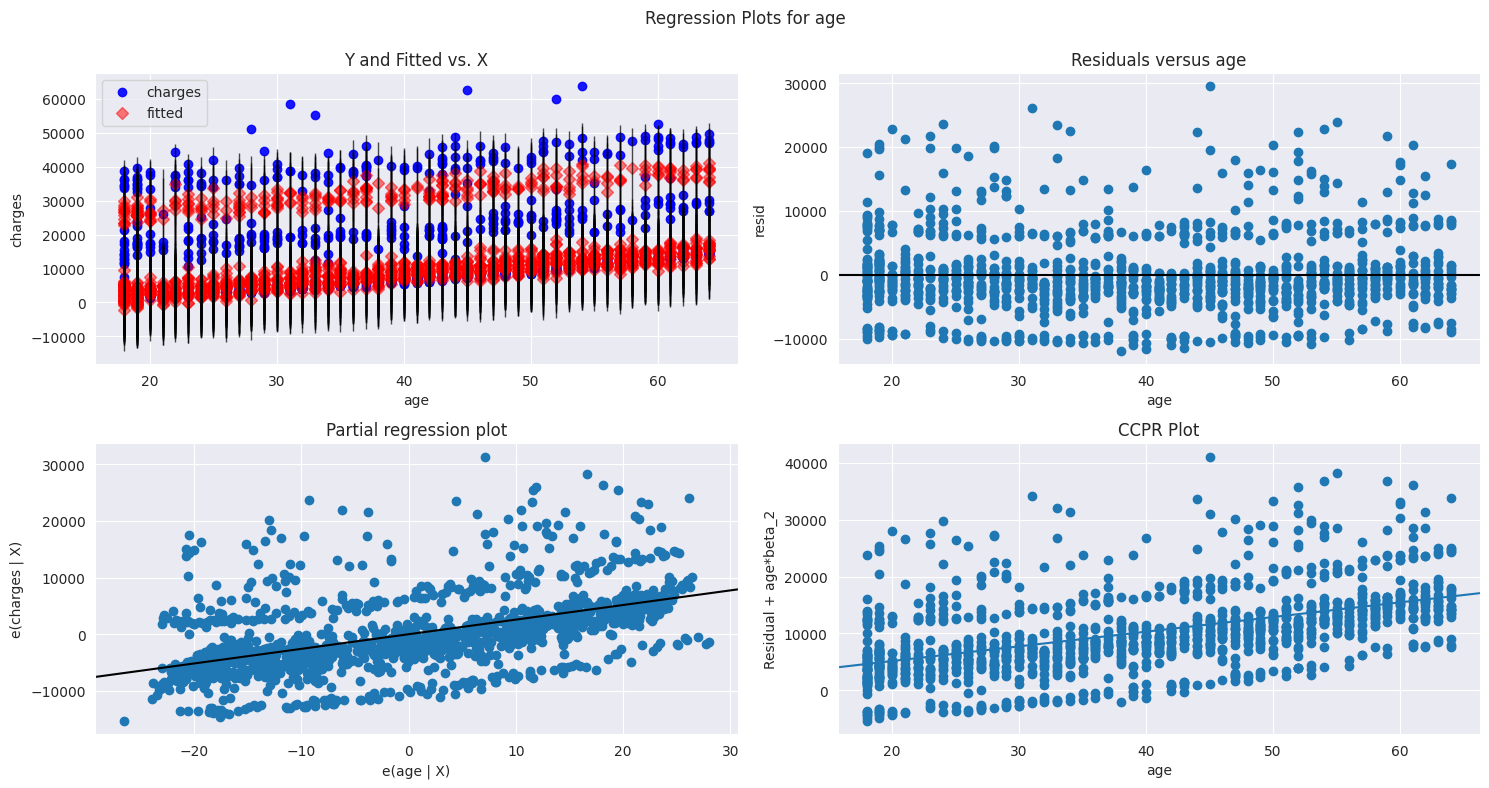

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

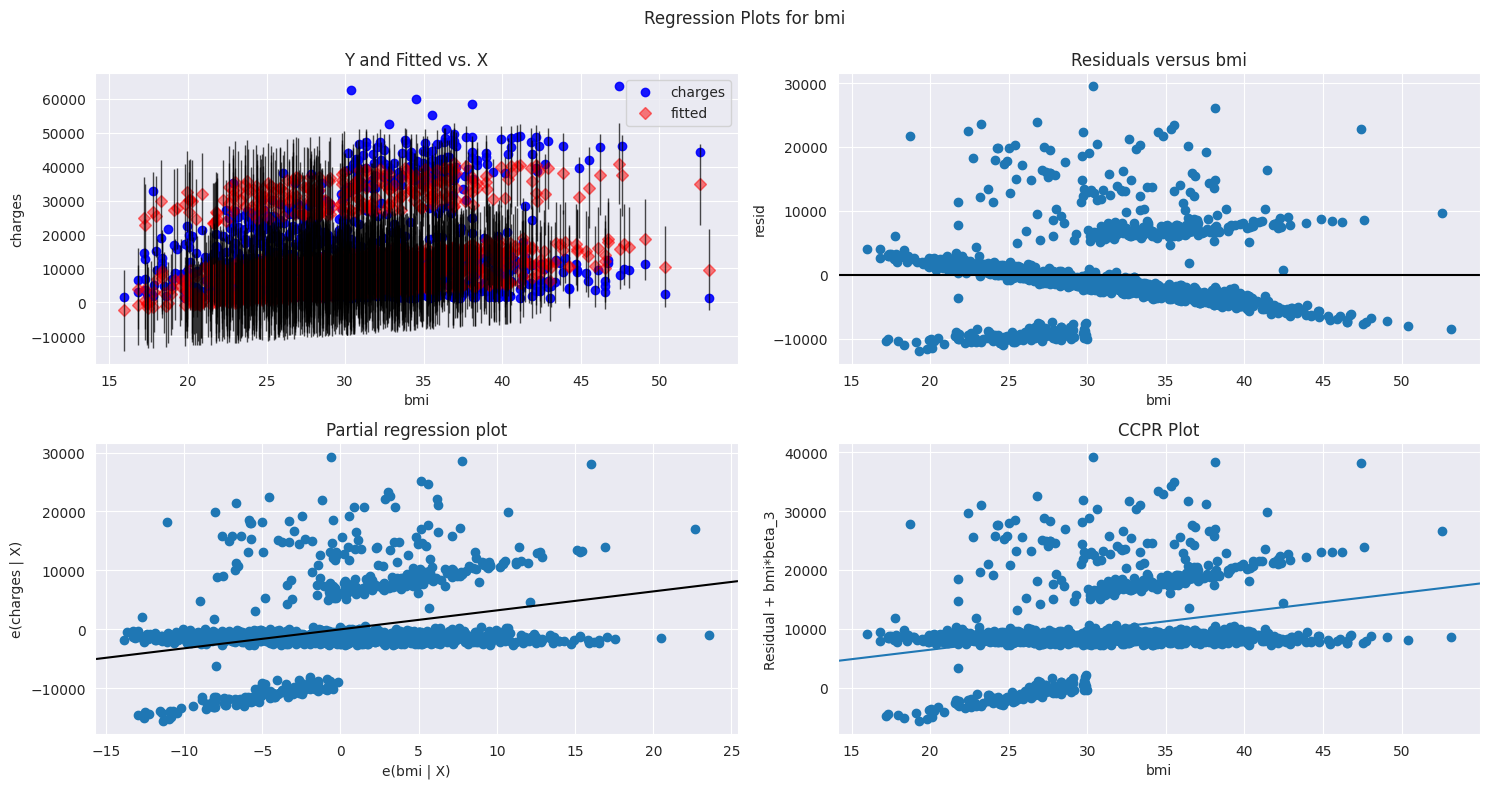

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bmi", fig=fig)
plt.show()

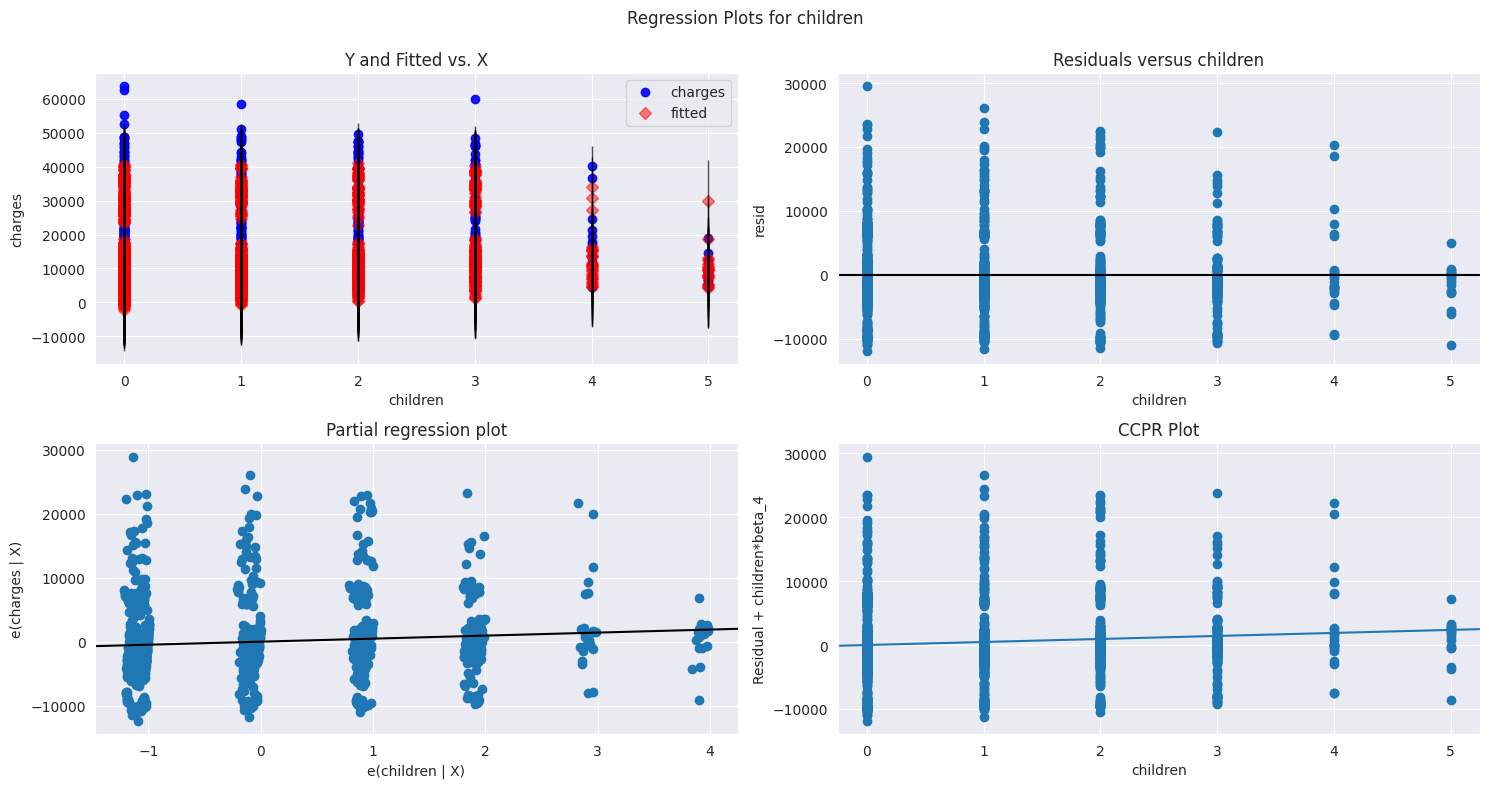

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "children", fig=fig)
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/outliers

# *Cook's Distance*

In [38]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

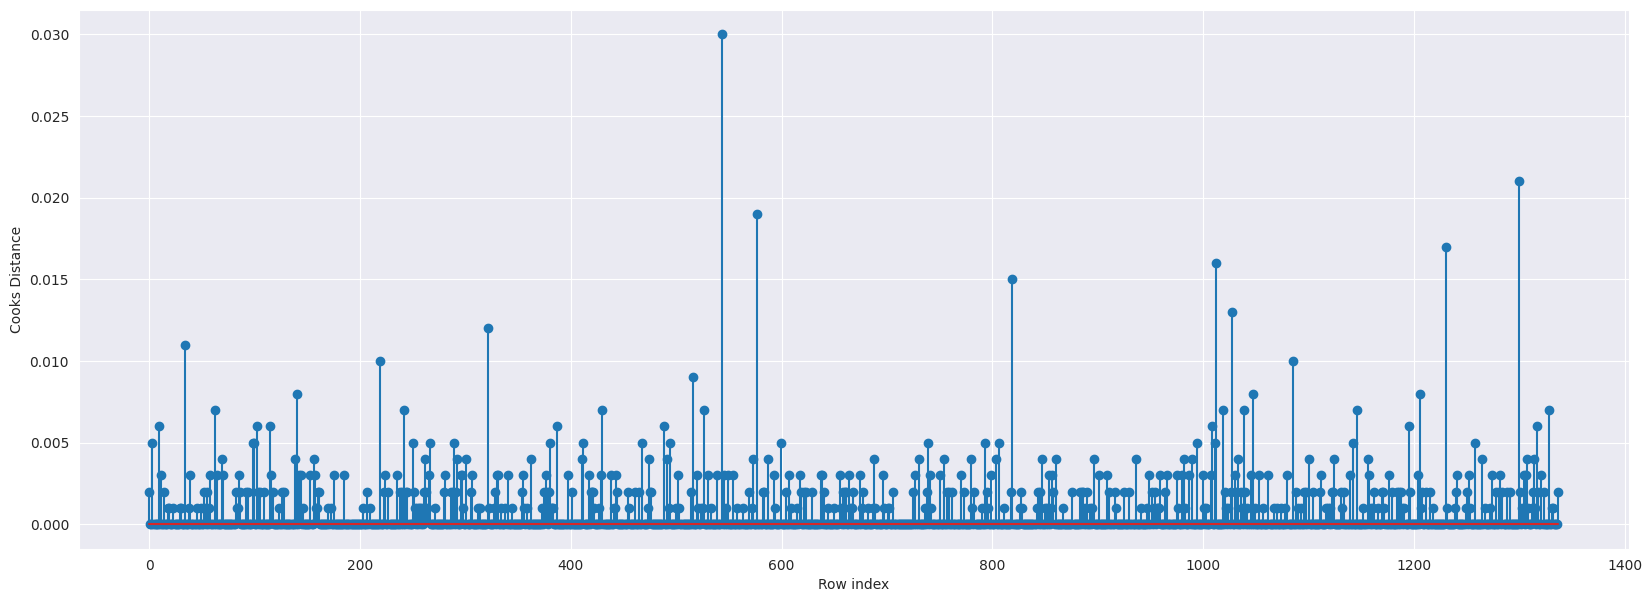

In [39]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(insurance)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(np.int64(543), np.float64(0.030448715396588562))

# High Influence Points

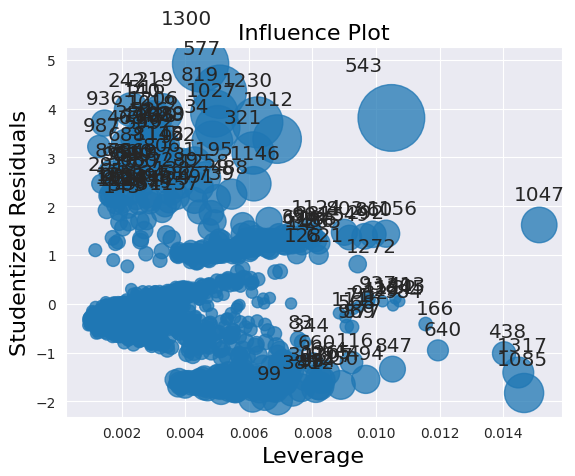

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [42]:
k = insurance.shape[1]
n = insurance.shape[0]
leverage_cutoff = 3*((k + 1)/n)

From the above plot, it is evident that data points 577, 543 and 1047 are the influencers

In [43]:
insurance[insurance.index.isin([577, 543, 1047])]

,age,sex,bmi,children,smoker,region,charges
543,54,0,47.410,0,0,1,63770.42801
577,31,0,38.095,1,0,3,58571.07448
1047,22,1,52.580,1,0,1,44501.39820


In [44]:
#See the differences in bmi and other variable values
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


# Improving the Model

In [45]:
#Load the data
insurance_new = pd.read_csv("insurance.csv")

In [46]:
#Discard the data points which are influencers and reasign the row number (reset_index())
insurance1=insurance_new.drop(insurance_new.index[[543,577,1047]],axis=0).reset_index()

In [47]:
#Drop the original index
insurance1=insurance1.drop(['index'],axis=1)

In [48]:
insurance1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1330,50,male,30.970,3,no,northwest,10600.54830
1331,18,female,31.920,0,no,northeast,2205.98080
1332,18,female,36.850,0,no,southeast,1629.83350
1333,21,female,25.800,0,no,southwest,2007.94500


# Build Model

In [49]:
#Exclude variable "smoke" and generate R-Squared and AIC values
final_ml_s= smf.ols('charges~age+bmi+children',data = insurance).fit()

In [50]:
(final_ml_s.rsquared,final_ml_s.aic,final_ml_s.bic)

(np.float64(0.1200981957624696),
 np.float64(28792.072836993786),
 np.float64(28812.86856195654))

In [51]:
#Exclude variable "bmi" and generate R-Squared and AIC values
final_ml_W= smf.ols('charges~smoker+age+children',data = insurance).fit()

In [52]:
(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

(np.float64(0.7237432233573071),
 np.float64(27242.027223461464),
 np.float64(27262.82294842422))

In [53]:
#Exclude variable "age" and generate R-Squared and AIC values
final_ml_a= smf.ols('charges~smoker+bmi+children',data = insurance).fit()

In [54]:
(final_ml_a.rsquared,final_ml_a.aic,final_ml_a.bic)

(np.float64(0.6614794805614304),
 np.float64(27513.98097628381),
 np.float64(27534.776701246563))

In [55]:
#Exclude variable "children" and generate R-Squared and AIC values
final_ml_ch= smf.ols('charges~smoker+bmi+age',data = insurance).fit()

In [56]:
(final_ml_ch.rsquared,final_ml_ch.aic,final_ml_ch.bic)

(np.float64(0.7474771588119513),
 np.float64(27121.835916308668),
 np.float64(27142.631641271422))

# Cook's Distance

In [57]:
model_influence_s = final_ml_s.get_influence()
(c_s, _) = model_influence_s.cooks_distance

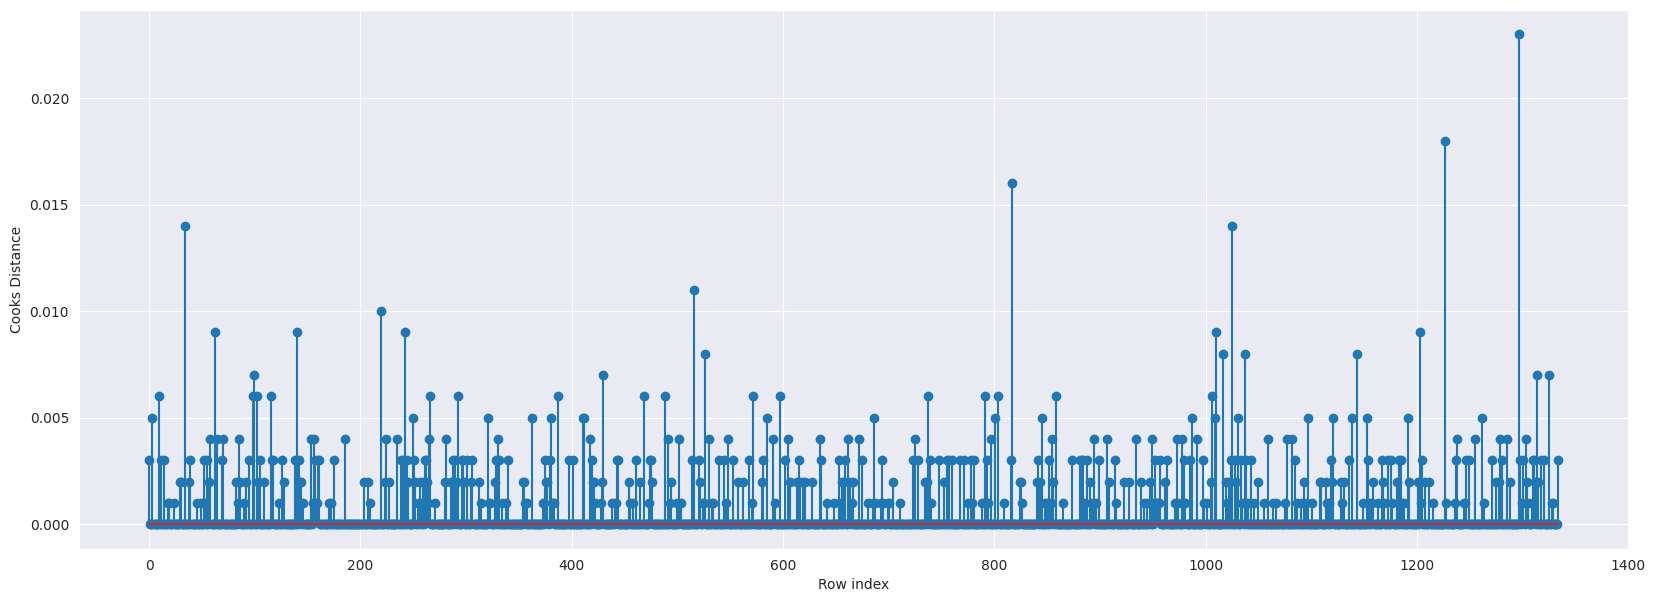

In [58]:
# Ensure c_s is calculated for the correct DataFrame (insurance1)
final_ml_s_insurance1 = smf.ols('charges~smoker+age+bmi', data=insurance1).fit()  # Fit the model to insurance1
model_influence_s_insurance1 = final_ml_s_insurance1.get_influence()
(c_s, _) = model_influence_s_insurance1.cooks_distance  # Recalculate Cook's distance

fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(insurance1)), np.round(c_s, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
#index of the data points where c is more than .5
(np.argmax(c_s),np.max(c_s))

(np.int64(1297), np.float64(0.022814847676800476))

In [60]:
#Drop 1297 and 543 observations
insurance2=insurance1.drop(insurance1.index[[543,577,1047,1297]],axis=0)

In [61]:
insurance2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1330,50,male,30.970,3,no,northwest,10600.54830
1331,18,female,31.920,0,no,northeast,2205.98080
1332,18,female,36.850,0,no,southeast,1629.83350
1333,21,female,25.800,0,no,southwest,2007.94500


In [62]:
#Reset the index and re arrange the row values
insurance3=insurance2.reset_index()

In [63]:
insurance4=insurance3.drop(['index'],axis=1)

In [64]:
insurance4

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1326,50,male,30.970,3,no,northwest,10600.54830
1327,18,female,31.920,0,no,northeast,2205.98080
1328,18,female,36.850,0,no,southeast,1629.83350
1329,21,female,25.800,0,no,southwest,2007.94500


In [65]:
#Build the model on the new data
final_ml_s= smf.ols('charges~smoker+age+bmi',data = insurance4).fit()

In [66]:
#Again check for influencers
model_influence_s = final_ml_s.get_influence()
(c_s, _) = model_influence_s.cooks_distance

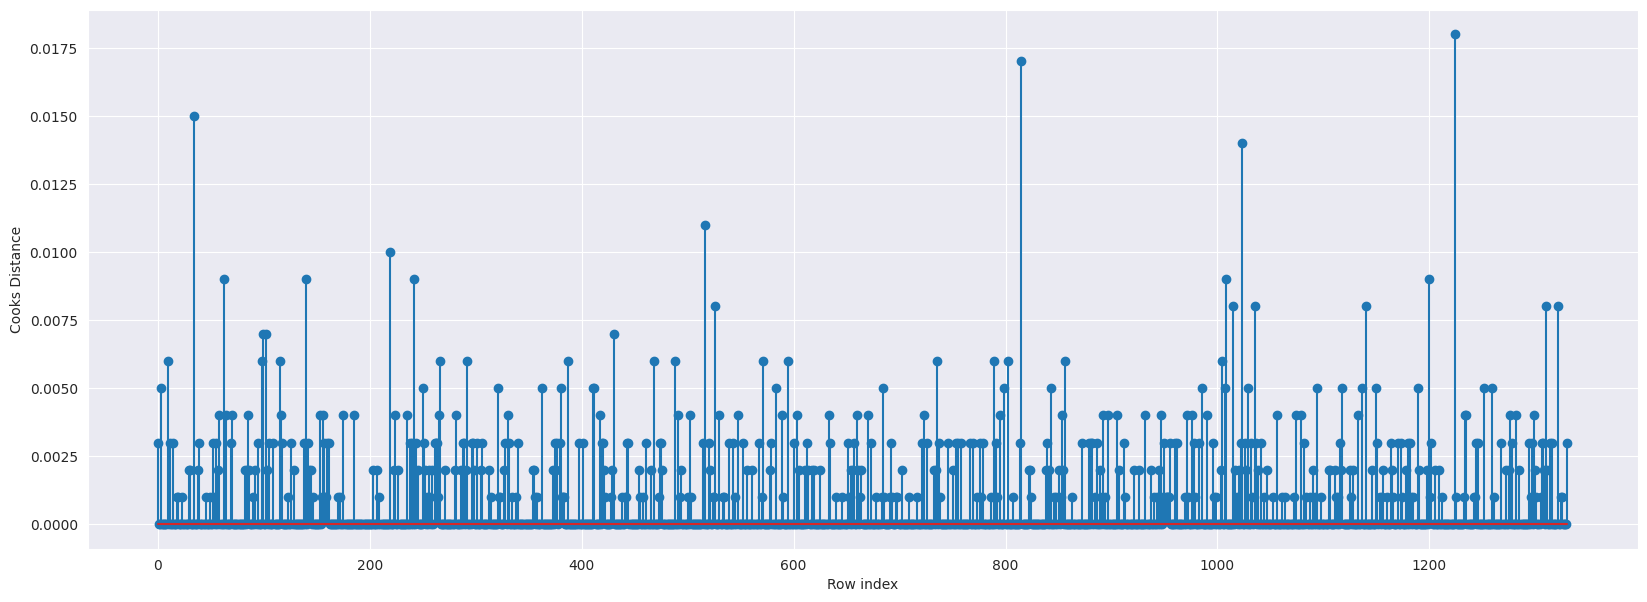

In [67]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(insurance4)),np.round(c_s,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [68]:
#index of the data points where c is more than .5
(np.argmax(c_s),np.max(c_s))

(np.int64(1224), np.float64(0.018253186008236333))

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [69]:
#Check the accuracy of the model
final_ml_s= smf.ols('charges~smoker+age+bmi',data = insurance4).fit()

In [70]:
(final_ml_s.rsquared,final_ml_s.aic)

(np.float64(0.7480426185004819), np.float64(26927.353311581657))

# Predicting for new data

In [75]:
#New data for prediction
new_data=pd.DataFrame({'smoker':'yes',"age":38,"bmi":39,"children":3},index=[1])

In [76]:
final_ml_s.predict(new_data)

,0
1,34137.826577


In [77]:
final_ml_s.predict(insurance_new.iloc[0:5,])

,0
0,25792.256309
1,3839.774964
2,6201.592666
3,4339.125265
4,5975.648680


In [78]:
pred_y = final_ml_s.predict(insurance_new)

In [79]:
pred_y

,0
0,25792.256309
1,3839.774964
2,6201.592666
3,4339.125265
4,5975.648680
...,...
1333,11294.405492
1334,3271.637117
1335,4785.647705
1336,2171.661464
